## Numpy 1d arrays

In [49]:
import numpy as np
import pandas as pd

In [1]:
[0,1,2,3,4]

[0, 1, 2, 3, 4]

In [4]:
a = np.array([0,1,2,3,4])
a

array([0, 1, 2, 3, 4])

In [5]:
type(a)

numpy.ndarray

In [7]:
a.dtype

dtype('int64')

In [8]:
# number of elements
a.size

5

In [11]:
# dimension
a.ndim

1

In [12]:
# size of array in each dimension
a.shape

(5,)

## Indexing and Slicing

In [13]:
c = np.array([20,1,2,3,4])

c[0] = 100
c

array([100,   1,   2,   3,   4])

In [14]:
d = c[1:4]
d

array([1, 2, 3])

## Operations

In [16]:
# addiction and substraction
u = np.array([1,0])
v = np.array([0,1])
z = u + v
w = u - v
print(z)
print(w)

[1 1]
[ 1 -1]


In [18]:
# multiplication with a scalar
2 * u

array([2, 0])

In [19]:
# product of two arrays
u * v

array([0, 0])

In [20]:
# dot product
np.dot(u,v)

0

In [21]:
# add constant
u + 1

array([2, 1])

In [24]:
# Universal functions
a = np.array([1,-1,1,-1])

print(a.mean())
print(a.min())
print(a.max())

0.0
-1
1


In [26]:
# Trigonometric
np.pi

x = np.array([0,np.pi/2,np.pi])
y = np.sin(x)

In [28]:
# Linspace
np.linspace(-2,2,num=9)


array([-2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ])

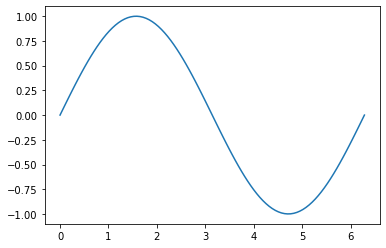

In [30]:
# Plotting
import matplotlib.pyplot as plt

x = np.linspace(0,2*np.pi,100)
y = np.sin(x)


%matplotlib inline
plt.plot(x,y)

## Numpy array 2d

In [31]:
a = [[11,12,13],[21,22,23],[31,32,33]]

A = np.array(a)
A

array([[11, 12, 13],
       [21, 22, 23],
       [31, 32, 33]])

In [32]:
A.ndim

2

In [33]:
A.shape

(3, 3)

In [34]:
A.size

9

In [35]:
A[0,0:2]

array([11, 12])

In [36]:
# Sum
x = np.array([[1,0],[0,1]])
y = np.array([[2,1],[1,2]])

x+y

array([[3, 1],
       [1, 3]])

In [37]:
# Multuply by constant
2 * y

array([[4, 2],
       [2, 4]])

In [39]:
# Product between 2 arrays
x * y

array([[2, 0],
       [0, 2]])

In [41]:
# Matricial Product
A = [[0,1,1],[1,0,1]]
B = [[1,1],[1,1],[-1,1]]
np.dot(A,B)

array([[0, 2],
       [0, 2]])

## API NBA

In [43]:
#!pip install nba_api
from nba_api.stats.static import teams

In [44]:
nba_teams = teams.get_teams()
nba_teams[:5]

[{'id': 1610612737,
  'full_name': 'Atlanta Hawks',
  'abbreviation': 'ATL',
  'nickname': 'Hawks',
  'city': 'Atlanta',
  'state': 'Atlanta',
  'year_founded': 1949},
 {'id': 1610612738,
  'full_name': 'Boston Celtics',
  'abbreviation': 'BOS',
  'nickname': 'Celtics',
  'city': 'Boston',
  'state': 'Massachusetts',
  'year_founded': 1946},
 {'id': 1610612739,
  'full_name': 'Cleveland Cavaliers',
  'abbreviation': 'CLE',
  'nickname': 'Cavaliers',
  'city': 'Cleveland',
  'state': 'Ohio',
  'year_founded': 1970},
 {'id': 1610612740,
  'full_name': 'New Orleans Pelicans',
  'abbreviation': 'NOP',
  'nickname': 'Pelicans',
  'city': 'New Orleans',
  'state': 'Louisiana',
  'year_founded': 2002},
 {'id': 1610612741,
  'full_name': 'Chicago Bulls',
  'abbreviation': 'CHI',
  'nickname': 'Bulls',
  'city': 'Chicago',
  'state': 'Illinois',
  'year_founded': 1966}]

In [50]:
def one_dict(list_dict):
  keys = list_dict[0].keys()
  out_dict = {key:[] for key in keys}
  for dict_ in list_dict:
    for key, value in dict_.items():
      out_dict[key].append(value)
  return out_dict

dict_nba_team = one_dict(nba_teams)
df_teams = pd.DataFrame(dict_nba_team)
df_teams.head()

,id,full_name,abbreviation,nickname,city,state,year_founded
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Atlanta,1949
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966


In [51]:
df_warriors = df_teams[df_teams["nickname"]=="Warriors"]
df_warriors

,id,full_name,abbreviation,nickname,city,state,year_founded
7,1610612744,Golden State Warriors,GSW,Warriors,Golden State,California,1946


In [52]:
id_warriors = df_warriors[["id"]].values[0][0]
id_warriors

1610612744

In [54]:
from nba_api.stats.endpoints import leaguegamefinder

gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable = id_warriors)

In [55]:
games = gamefinder.get_data_frames()[0]
games.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22022,1610612744,GSW,Golden State Warriors,1522200074,2022-07-17,GSW vs. WAS,L,201,77,...,0.667,12.0,33.0,45.0,15,6,6,21,20,-10.0
1,22022,1610612744,GSW,Golden State Warriors,1522200056,2022-07-15,GSW vs. OKC,L,202,82,...,0.667,4.0,31.0,35.0,14,7,3,16,23,-8.0
2,22022,1610612744,GSW,Golden State Warriors,1522200035,2022-07-12,GSW vs. BOS,L,199,92,...,0.667,16.0,22.0,38.0,14,7,8,13,23,-18.4
3,22022,1610612744,GSW,Golden State Warriors,1522200023,2022-07-10,GSW @ SAS,W,200,86,...,0.581,13.0,25.0,38.0,14,7,6,16,30,1.0
4,22022,1610612744,GSW,Golden State Warriors,1522200007,2022-07-08,GSW @ NYK,L,200,88,...,0.700,11.0,28.0,39.0,13,8,4,23,20,-10.4


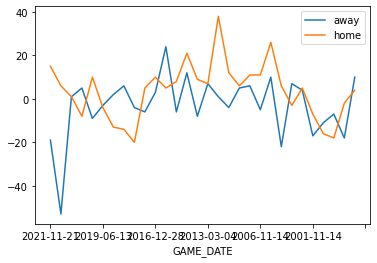

In [57]:
games_home = games[games["MATCHUP"]=="GSW vs. TOR"]
games_away = games[games["MATCHUP"]=="GSW @ TOR"]


import matplotlib.pyplot as plt

fig, ax = plt.subplots()
games_away.plot(x="GAME_DATE",y="PLUS_MINUS",ax=ax)
games_home.plot(x="GAME_DATE",y="PLUS_MINUS",ax=ax)
ax.legend(["away","home"])
plt.show()

## API TRANSLATOR

In [61]:
#!pip install ibm_watson
from ibm_watson import SpeechToTextV1

In [60]:
from nba_api.stats.library.parameters import StartPeriod
url_s2t = "https://stream.watsonplatform.net/speech-to-text/api"\
iam_apikey_s2t = "xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx"

s2t = SpeechToTextV1(iam_apikey_s2t, url_s2t)

In [ ]:
filename = "test.wav"

with open(filename, "rb"):
  response = s2t.recognize(audio=wav,content_type="audio/wav")

response.result

recongnized_text = response.result["results"][0]["alternatives"][0]["transcript"]

recongnized_text